In [1]:
from qiskit import *
import numpy as np

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/qiskit/__init__.py:66: DeprecationWarning: Using Qiskit with Python 3.6 is deprecated as of qiskit-terra 0.17.0. Support for running Qiskit with Python 3.6 will be removed in qiskit-terra 0.20.0.
  DeprecationWarning,


In [2]:
import matplotlib

In [3]:
from config import api_key

In [4]:
import qiskit
qiskit.__qiskit_version__

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.1', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.16.0', 'qiskit-aqua': '0.9.4', 'qiskit': '0.29.0', 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

# Create a Quantum Circuit acting on a quantum register of 2 qubits and 2 classic bits

In [5]:
circuit = QuantumCircuit(2,2)

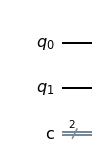

In [6]:
circuit.draw(output='mpl')

# Create Entanglement
# A Hadamard gate (𝐻) is applied on qubit 0, which puts it into the superposition state (|0⟩ + |1⟩) /√2

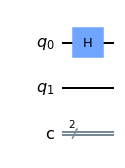

In [7]:
circuit.h(0)
circuit.draw(output='mpl')

# A controlled-Not operation (𝐶𝑋) is applied between qubit 0 and qubit 1. q0 acts as the control, and q1 acts as the target qubit. 

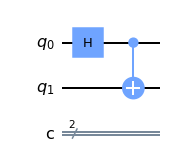

In [8]:
circuit.cx(0,1)
circuit.draw(output='mpl')

# Entanglement is a key ingredient of many aspects of quantum computing.
# By creating entanglement, this allows us to take qubits far away from each other. Thus, allowing applications, such as teleporting information between qubits over far distances. 
# Also, when it comes to applying control gates (cx and cz) on entangled states, they act in parallel on the two states.
# ----------------------------------------------------------------------------------

# Apply measurements to q0 and q1 and store in c0 and c1. Measurements cause the quantum system to collapse into classical bits.

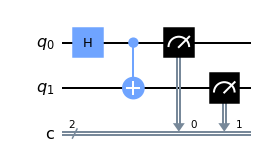

In [10]:
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')

In [11]:
simulator= Aer.get_backend('qasm_simulator')

In [12]:
result= execute(circuit, backend=simulator).result()

In [13]:
from qiskit.tools.visualization import plot_histogram

# We get about 50% 00 and 50% 11 as the result. There is a small amount of error due to a limited number of shots instead of an infinite number of shots.

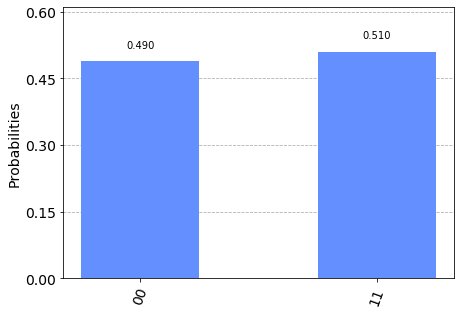

In [14]:
plot_histogram(result.get_counts(circuit))

# Now, let's run the circuit on a real quantum computer at IBM !

In [15]:
from qiskit import IBMQ

In [16]:
IBMQ.save_account(api_key)

configrc.store_credentials:WARNING:2021-09-13 14:07:20,578: Credentials already present. Set overwrite=True to overwrite.


In [17]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [18]:
provider= IBMQ.get_provider(hub='ibm-q', group='open',project='main')

In [19]:
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_m

In [20]:
qcomp= provider.get_backend('ibmq_santiago')

In [21]:
job= execute(circuit, backend=qcomp)

In [22]:
from qiskit.tools.monitor import job_monitor

In [23]:
job_monitor(job)

Job Status: job has successfully run


# In these results, we have a small number of results show up as 01 and 10. This is due to susceptibility to randomness and quantum errors

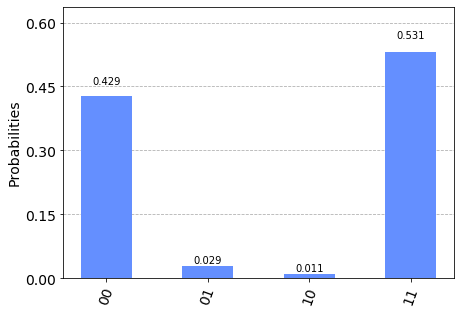

In [24]:
result= job.result()
plot_histogram(result.get_counts(circuit))

# Visualizing Quantum Circuits

In [25]:
from qiskit.tools.visualization import plot_bloch_multivector

# Here, we use a state vector simulator. This describes the quantum state of the qubit(s),  which is a complex vector of dimensions 2^𝑛 where 𝑛 is the number of qubits. The state vector returned after applying one X-gate is 0 with 0 imaginary components and 1 with 0 imaginary components. (Qubits are measured as complex numbers)

[0.+0.j 1.+0.j]


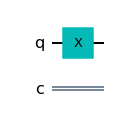

In [26]:
circ= QuantumCircuit(1,1)
circ.x(0)
simulator= Aer.get_backend('statevector_simulator')
result= execute(circ, backend= simulator).result()
statevector= result.get_statevector()
print(statevector)
circ.draw(output='mpl')

In [27]:
from mpl_toolkits import mplot3d

# This is the state vector on a bloch sphere. Operations on quantum states can also be described as "rotations on a sphere." This visualization shows how the X-gate took q0 from |0> to |1>.

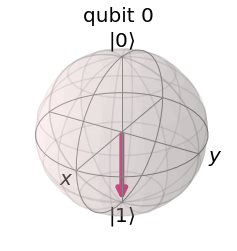

In [28]:
plot_bloch_multivector(statevector)

# Now, you can see the result of our circuit is plotted on a histogram shown as 1

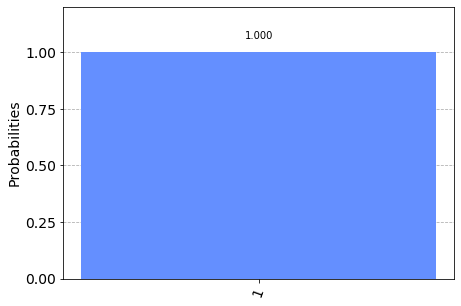

In [29]:
circ.measure([0], [0])
backend= Aer.get_backend('qasm_simulator')
result= execute(circ, backend=backend, shots= 1024).result()
counts= result.get_counts()
plot_histogram(counts)

# This results prints the matrix for the X-gate 
# [0 1]
# [1 0]

In [30]:
circ= QuantumCircuit(1,1)
circ.x(0)
simulator= Aer.get_backend('unitary_simulator')
result= execute(circ, backend= simulator).result()
unitary= result.get_unitary()
print(unitary)

[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]


# In this plot, the right plot shows real components and the left plot shows imaginary components of the state density matrix. For our results, the real components plot (1,1) and there are no imaginary components.

In [31]:
from qiskit.visualization import plot_state_city

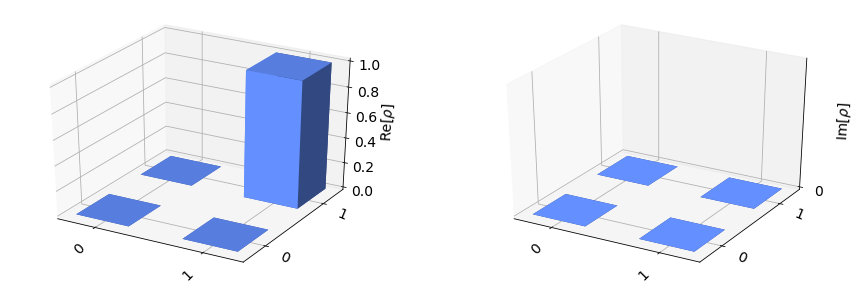

In [32]:
plot_state_city(statevector)

# Quantum Teleportation Algorithm

In [33]:
# Quantum Teleportation: the transfer of quantum states from one qubit to another, more specifically, 
# transferring information from one qubit to another. Unlike regular computers, copying information is not
# viable since copying information would imply applying a measurement on the qubit which would destroy the
# quantum state. 

In [34]:
circ = QuantumCircuit(3,3)

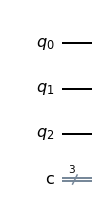

In [35]:
circ.draw(output='mpl')

# Transfer the state of q0 (value of 1) to q2 (value of 0)

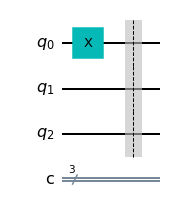

In [36]:
# Apply an x-gate to transform q0 from 0 to a state of 1
circ.x(0)
circ.barrier()
circ.draw(output='mpl')

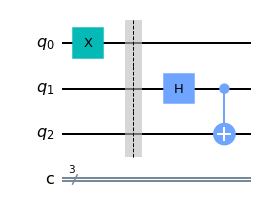

In [37]:
# Create entanglement between q1 and q2 to initiate teleportation process
circ.h(1)
circ.cx(1,2)
circ.draw(output='mpl')

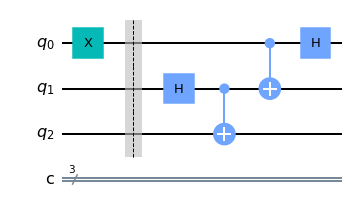

In [38]:
# Apply controlled X-gate to q0 to q1, and h-gate to q0
circ.cx(0,1)
circ.h(0)
circ.draw(output='mpl')

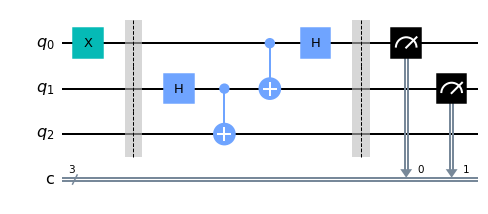

In [39]:
# Apply measurements to q0 and q1
circ.barrier()
circ.measure([0,1], [0,1])
circ.draw(output='mpl')

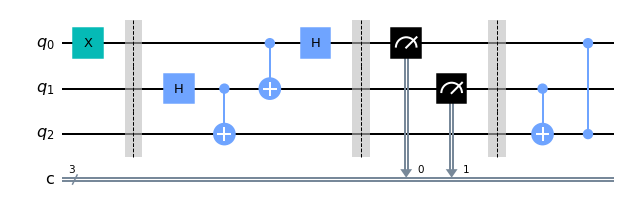

In [40]:
# Lastly, apply controlled X-gate to q1 to q2 and controlled Z-gate to q0 to q2
circ.barrier()
circ.cx(1,2)
circ.cz(0,2)
circ.draw(output='mpl')

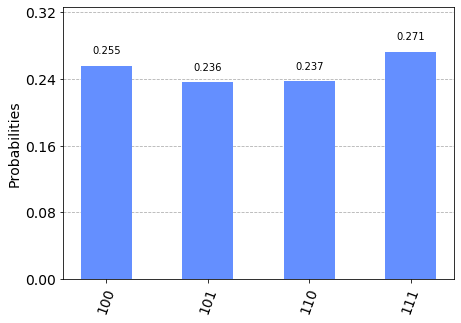

In [41]:
# Measure q2 and put it on c2
circ.measure(2,2)
simulator = Aer.get_backend('qasm_simulator')
result= execute(circ, backend=simulator, shots=1024).result()
counts=result.get_counts()
plot_histogram(counts)

# As you can see, our results display measurements where c2 = 1, where the first digit is equal to 1

In [42]:
print(counts)

{'111': 278, '100': 261, '110': 243, '101': 242}
